In [100]:
#Install Yahoo finance
!pip install yfinance
!pip install --upgrade yfinance

In [101]:
#Importing libraries
import numpy as np
import pandas as pd

#Finance data sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date, timedelta

# Understanding Data-Driven Decisions data pulls

In [102]:
end = date.today()
print(f'Year = {end.year}; month = {end.month}; day = {end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end}')

Year = 2024; month = 4; day = 24
Period for indexes: 1954-04-24 to 2024-04-24


## 1.1) GDP

In [103]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [104]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.021312
2023-07-01,22369.71,0.021719,0.021719
2023-10-01,22495.19,0.022190,0.022190
2024-01-01,22618.15,0.022251,0.022251
2024-04-01,22739.00,0.022151,0.022151


## 1.2 Inflation - CPI Core

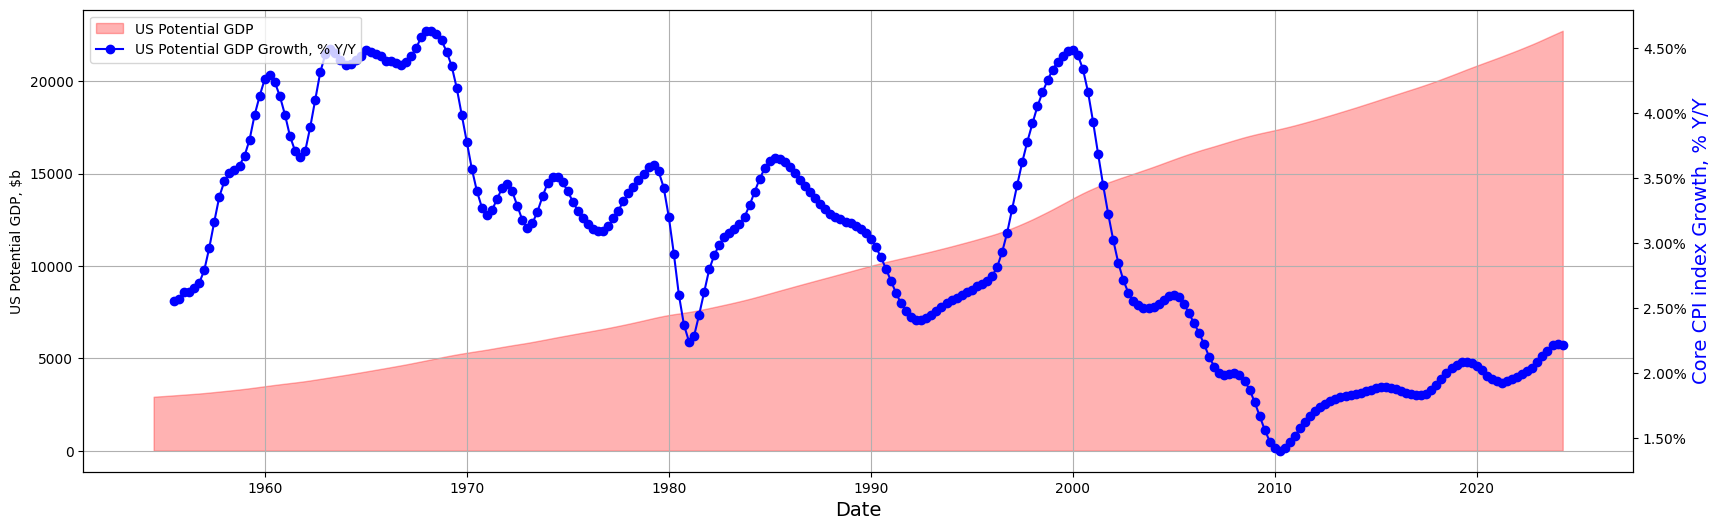

In [105]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b")
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

##1.3 Interest Rates

In [106]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail()

,FEDFUNDS
DATE,
2023-11-01,5.33
2023-12-01,5.33
2024-01-01,5.33
2024-02-01,5.33
2024-03-01,5.33


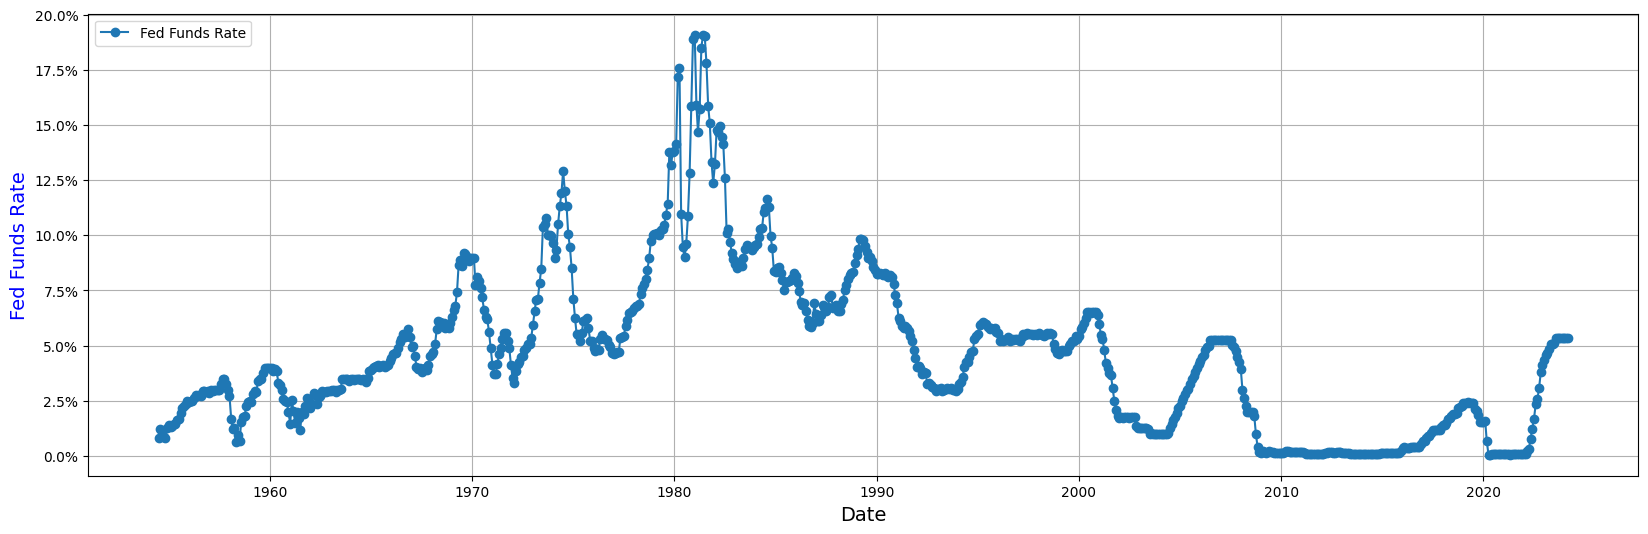

In [107]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()


In [108]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2024-04-17,5.16
2024-04-18,5.18
2024-04-19,5.17
2024-04-22,5.16
2024-04-23,5.14


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115

https://fred.stlouisfed.org/series/DGS2
https://fred.stlouisfed.org/series/DGS3
https://fred.stlouisfed.org/series/DGS5
https://fred.stlouisfed.org/series/DGS10 ...

In [109]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2024-04-17,4.62
2024-04-18,4.68
2024-04-19,4.66
2024-04-22,4.66
2024-04-23,4.63


## 1.4 S&P 500

In [110]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.330851e+09
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09


In [111]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [112]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.330851e+09,0.011965,0.042336,0.226691
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09,0.008731,0.033022,0.213282
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09,-0.008759,0.026327,0.195621
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09,-0.002208,0.048145,0.206083
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09,-0.005781,0.059715,0.209786


In [113]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

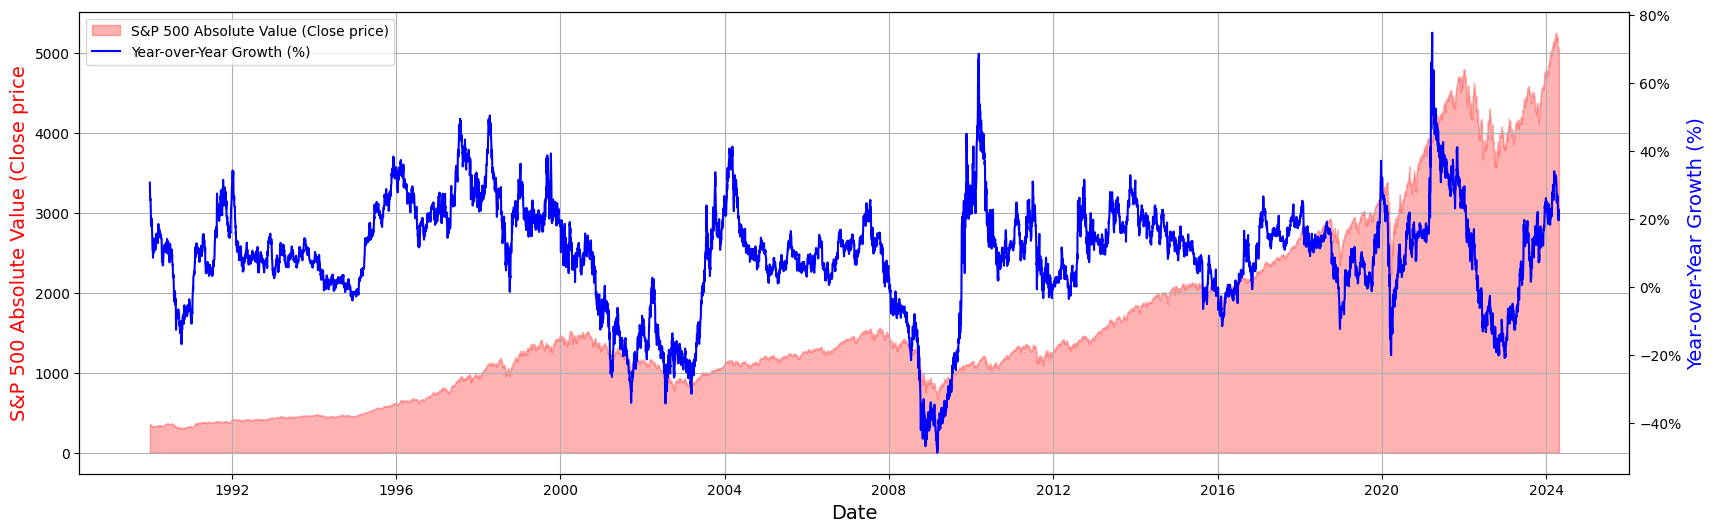

In [114]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# 2)Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [115]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [116]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,17775.410156,17863.320312,17716.919922,17837.400391,17837.400391,60700500
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400
2024-04-23,17861.199219,18144.660156,17861.199219,18137.650391,18137.650391,68529200
2024-04-24,18140.189453,18226.320312,18060.259766,18088.699219,18088.699219,0


In [117]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [118]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-18,17775.410156,17863.320312,17716.919922,17837.400391,17837.400391,60700500,15863.950195,0.124398
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700,15872.129883,0.117516
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400,15795.730469,0.130736


<Axes: xlabel='Date'>

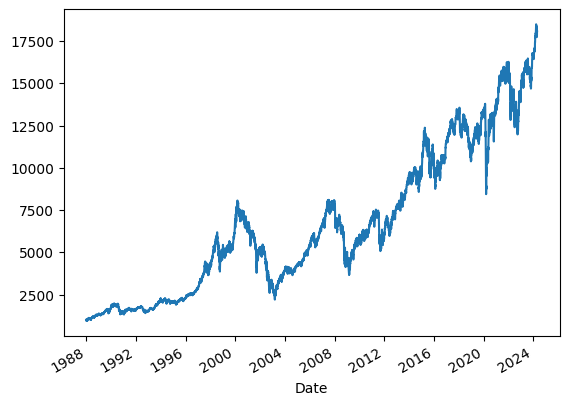

In [119]:
dax_daily['Adj Close'].plot.line()

In [22]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
snp500_daily = yf.download(tickers = "^SPX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [23]:
snp500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,2529326486


In [24]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [25]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,2523336000


In [26]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


## 2.2 OHLCV data daily - ETFs

In [27]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch
voo_etf = yf.download(tickers = "VOO",
                     period = "max",
                     interval = "1d")


[*********************100%%**********************]  1 of 1 completed


In [28]:
voo_etf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,461.359985,463.299988,458.209991,458.940002,458.940002,5637300
2024-04-19,458.989990,459.940002,453.899994,455.100006,455.100006,9766100
2024-04-22,457.549988,461.730011,455.350006,459.049988,459.049988,5818100
2024-04-23,461.179993,465.130005,460.670013,464.839996,464.839996,4257400
2024-04-24,465.570007,466.290009,462.450012,464.500000,464.500000,7663315


In [29]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [30]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4069, 6)


In [31]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


In [32]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,31.129999,31.26,31.000000,31.200001,29.303230,607700
2022-06-24,29.549999,29.91,29.500000,29.900000,29.847267,387900
2022-06-27,29.799999,29.82,29.660000,29.709999,29.657600,225400
2022-06-28,29.709999,29.76,29.389999,29.420000,29.368114,466600


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

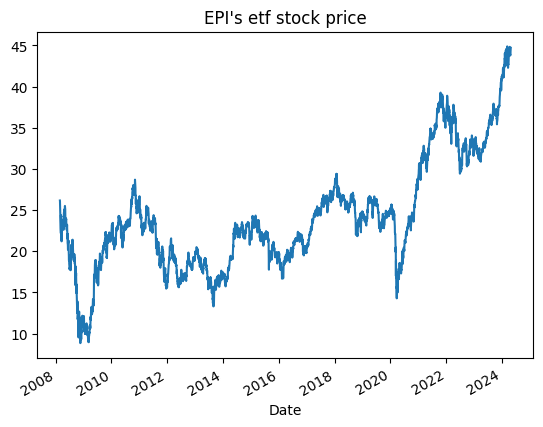

In [33]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [34]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [35]:
# get dividends as Series
epi.get_dividends()

Date
2008-12-22 00:00:00-05:00    0.091
2009-03-23 00:00:00-04:00    0.007
2009-06-22 00:00:00-04:00    0.002
2009-09-21 00:00:00-04:00    0.045
2009-12-21 00:00:00-05:00    0.006
2010-06-28 00:00:00-04:00    0.065
2010-09-20 00:00:00-04:00    0.065
2010-12-22 00:00:00-05:00    0.013
2011-06-22 00:00:00-04:00    0.062
2011-09-26 00:00:00-04:00    0.098
2012-03-26 00:00:00-04:00    0.010
2012-06-25 00:00:00-04:00    0.045
2012-09-24 00:00:00-04:00    0.083
2012-12-24 00:00:00-05:00    0.024
2013-06-24 00:00:00-04:00    0.068
2013-09-23 00:00:00-04:00    0.063
2014-03-24 00:00:00-04:00    0.099
2014-06-23 00:00:00-04:00    0.059
2014-09-22 00:00:00-04:00    0.068
2015-03-23 00:00:00-04:00    0.031
2015-06-22 00:00:00-04:00    0.067
2015-09-21 00:00:00-04:00    0.116
2015-12-21 00:00:00-05:00    0.024
2016-03-21 00:00:00-04:00    0.010
2016-06-20 00:00:00-04:00    0.125
2016-09-26 00:00:00-04:00    0.070
2016-12-23 00:00:00-05:00    0.006
2017-03-27 00:00:00-04:00    0.075
2017-06-26 00:0

## 2.3 Paid data - Poligon.io (news endpoint)
Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization

Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news


## 2.4 Macroeconomics
*   add some indictor examples


In [36]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [37]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

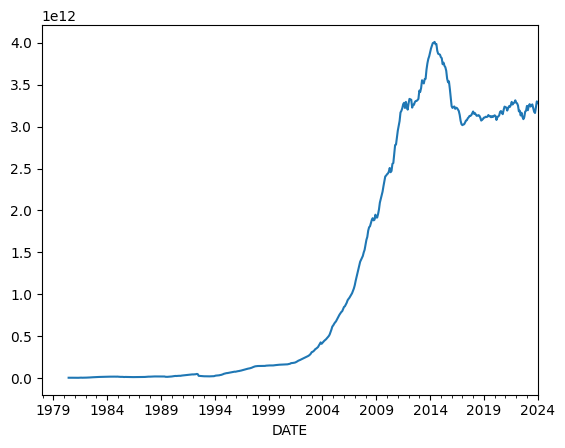

In [38]:
gold_reserves.TRESEGCNM052N.plot.line()

In [ ]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

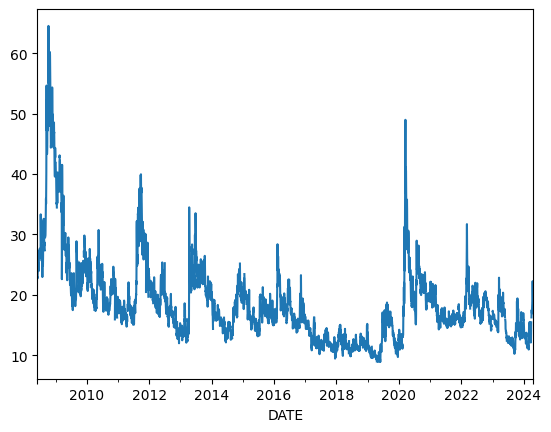

In [40]:
gold_volatility.GVZCLS.plot.line()

In [41]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

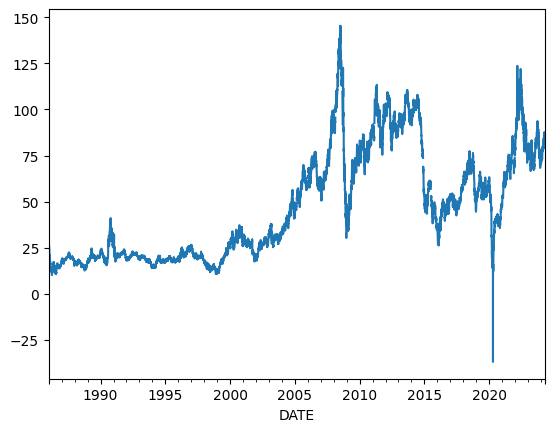

In [42]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [43]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

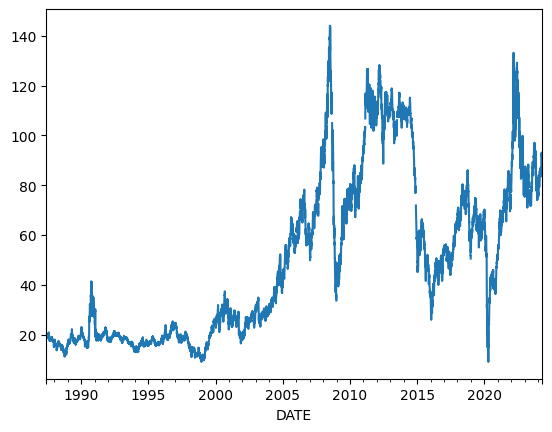

In [44]:
oil_brent.DCOILBRENTEU.plot.line()

In [ ]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [46]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0    Last  Previous  Highest    Lowest  \
0                   Currency   106.0     106.0   165.00     70.70   
1               Stock Market  5043.0    5071.0  5268.00      4.40   
2            GDP Growth Rate     3.4       4.9    34.80    -28.00   
3     GDP Annual Growth Rate     3.1       2.9    13.40     -7.50   
4          Unemployment Rate     3.8       3.9    14.90      2.50   
5          Non Farm Payrolls   303.0     270.0  4615.00 -20477.00   
6             Inflation Rate     3.5       3.2    23.70    -15.80   
7         Inflation Rate MoM     0.4       0.4     2.00     -1.80   
8              Interest Rate     5.5       5.5    20.00      0.25   
9           Balance of Trade   -68.9     -67.6     1.95   -103.00   
10           Current Account  -195.0    -196.0     9.96   -284.00   
11    Current Account to GDP    -3.0      -3.8     0.20     -6.00   
12    Government Debt to GDP   129.0     127.0   129.00     31.80   
13         Government Budget    -5

In [47]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,106.0,106.0,165.00,70.70,NaN,Apr/24
1,Stock Market,5043.0,5071.0,5268.00,4.40,points,Apr/24
2,GDP Growth Rate,3.4,4.9,34.80,-28.00,percent,Dec/23
3,GDP Annual Growth Rate,3.1,2.9,13.40,-7.50,percent,Dec/23
4,Unemployment Rate,3.8,3.9,14.90,2.50,percent,Mar/24
5,Non Farm Payrolls,303.0,270.0,4615.00,-20477.00,Thousand,Mar/24
6,Inflation Rate,3.5,3.2,23.70,-15.80,percent,Mar/24
7,Inflation Rate MoM,0.4,0.4,2.00,-1.80,percent,Mar/24
8,Interest Rate,5.5,5.5,20.00,0.25,percent,Mar/24
9,Balance of Trade,-68.9,-67.6,1.95,-103.00,USD Billion,Feb/24


## 2.5 Financial Reporting - EDGAR (in Yahoo)

In [48]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [49]:
# yearly financials for the last 4 years
nvda.financials

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,-284130000.0,0.0,0.0
Tax Rate For Calcs,0.12,0.21,0.019,0.017
Normalized EBITDA,35583000000.0,7340000000.0,11351000000.0,5691000000.0
Total Unusual Items,0.0,-1353000000.0,0.0,0.0
Total Unusual Items Excluding Goodwill,0.0,-1353000000.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,29760000000.0,4368000000.0,9752000000.0,4332000000.0
Reconciled Depreciation,1508000000.0,1544000000.0,1174000000.0,1098000000.0
Reconciled Cost Of Revenue,16621000000.0,11618000000.0,9439000000.0,6279000000.0
EBITDA,35583000000.0,5987000000.0,11351000000.0,5691000000.0
EBIT,34075000000.0,4443000000.0,10177000000.0,4593000000.0


In [50]:
# balance sheet
nvda.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,1380000000.0
Ordinary Shares Number,2464000000.0,2466136572.0,2506000000.0,2480000000.0
Share Issued,2464000000.0,2466136572.0,2506000000.0,3860000000.0
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0


In [51]:
# Basic info:
nvda.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [52]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

1991.925048828125

read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [53]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [ ]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

In [55]:
global_stocks.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Microsoft,MSFT,3039495716864,409.06,United States
1,2,Apple,AAPL,2609989812224,169.02,United States
2,3,NVIDIA,NVDA,1991925039104,796.77,United States
3,4,Alphabet (Google),GOOG,1991647166464,161.10,United States
4,5,Saudi Aramco,2222.SR,1942833479038,8.03,Saudi Arabia


In [56]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8386 non-null   int64  
 1   Name         8386 non-null   object 
 2   Symbol       8385 non-null   object 
 3   marketcap    8386 non-null   int64  
 4   price (USD)  8386 non-null   float64
 5   country      8384 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 393.2+ KB


# Homework

## Question 1: [Macro] Average growth of GDP in 2023
**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [57]:
gdpc1 = pdr.DataReader("GDPC1", "fred", start = start)

In [58]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


## Question 2. [Macro] Inverse "Treasury Yield"
**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [59]:
# https://fred.stlouisfed.org/series/DGS2

end = date.today()
print(f'Year = {end.year}; month = {end.month}; day={end.day}')

start = date(year=end.year-24, month=end.month-3, day=end.day-20)
print(f'Period for indexes: {start} to {end}')

dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2.tail()

Year = 2024; month = 4; day=24
Period for indexes: 2000-01-04 to 2024-04-24


,DGS2
DATE,
2024-04-17,4.93
2024-04-18,4.98
2024-04-19,4.97
2024-04-22,4.97
2024-04-23,4.86


In [ ]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

In [61]:
df = pd.DataFrame.join(dgs2, dgs10, lsuffix='_DGS2', rsuffix='_DGS10')
df

,DGS2,DGS10
DATE,,
2000-01-04,6.30,6.49
2000-01-05,6.38,6.62
2000-01-06,6.35,6.57
2000-01-07,6.31,6.52
2000-01-10,6.38,6.57
...,...,...
2024-04-17,4.93,4.59
2024-04-18,4.98,4.64
2024-04-19,4.97,4.62


In [62]:
df['Difference'] = df['DGS10'] - df['DGS2']
df

,DGS2,DGS10,Difference
DATE,,,
2000-01-04,6.30,6.49,0.19
2000-01-05,6.38,6.62,0.24
2000-01-06,6.35,6.57,0.22
2000-01-07,6.31,6.52,0.21
2000-01-10,6.38,6.57,0.19
...,...,...,...
2024-04-17,4.93,4.59,-0.34
2024-04-18,4.98,4.64,-0.34
2024-04-19,4.97,4.62,-0.35


In [63]:
min_difference = df['Difference'].min()
print(min_difference)

-1.0800000000000005


#Question 3. [Index] Which Index is better recently?
**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [128]:
#end = date.today()
#print(f'Year = {end.year}; month = {end.month}; day={end.day-12}')

#start = date(year=end.year-5, month=end.month, day=end.day-12)
#print(f'Period for indexes: {start} to {end}')

start_date = "2019-04-09"
end_date = "2024-04-09"


snp500_daily = yf.download(tickers = "^GSPC",
                        start=start_date, end=end_date,
                        interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [129]:
snp500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000


In [137]:
mxx_daily = yf.download(tickers = "^MXX",
                       start=start_date, end=end_date,
                        interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [138]:
mxx_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-02,57593.621094,57830.878906,57235.589844,57581.808594,57581.808594,180753600
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700
2024-04-05,57805.191406,58227.839844,57678.609375,58092.441406,58092.441406,212252300
2024-04-08,58021.660156,58192.320312,57749.441406,57989.941406,57989.941406,154641800


In [139]:
snp500_daily['adj_close_last_year'] = snp500_daily['Adj Close'].shift(252)
snp500_daily['yoy_growth'] = snp500_daily['Adj Close'] / snp500_daily['adj_close_last_year'] -1
snp500_daily


,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000,NaN,NaN
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900,NaN,NaN
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000,NaN,NaN
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400,NaN,NaN
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-02,57593.621094,57830.878906,57235.589844,57581.808594,57581.808594,180753600,53882.949219,0.068646
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300,54198.941406,0.060969
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700,53904.000000,0.073812


In [141]:
mxx_daily['adj_close_last_year'] = mxx_daily['Adj Close'].shift(252)
mxx_daily['yoy_growth'] = mxx_daily['Adj Close'] / mxx_daily['adj_close_last_year'] -1
mxx_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000,NaN,NaN
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900,NaN,NaN
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000,NaN,NaN
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400,NaN,NaN
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-02,57593.621094,57830.878906,57235.589844,57581.808594,57581.808594,180753600,53882.949219,0.068646
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300,54198.941406,0.060969
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700,53904.000000,0.073812


#Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [69]:
start_date = "2023-01-01"
end_date = "2023-12-31"

dax_daily = yf.download(tickers = "2222.SR",
                     start=start_date, end=end_date,
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [70]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-24,32.950001,33.099998,32.849998,33.000000,32.828049,12165552
2023-12-25,33.000000,33.099998,32.849998,33.099998,32.927525,15869070
2023-12-26,33.049999,33.099998,32.900002,33.049999,32.877789,14598967
2023-12-27,33.099998,33.250000,33.000000,33.150002,32.977268,14815683
2023-12-28,33.150002,33.250000,32.950001,33.049999,32.877789,12720450


In [71]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [72]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2023-01-01,29.227272,29.454544,29.181818,29.454544,28.475794,1569087,NaN,NaN
2023-01-02,29.545454,29.545454,29.227272,29.227272,28.256073,4693364,NaN,NaN
2023-01-03,29.227272,29.227272,29.227272,29.227272,28.256073,0,NaN,NaN
2023-01-04,29.181818,29.227272,28.681818,28.818180,27.860577,4618455,NaN,NaN
2023-01-05,28.818180,28.818180,28.363636,28.681818,27.728745,4797670,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-24,32.950001,33.099998,32.849998,33.000000,32.828049,12165552,NaN,NaN
2023-12-25,33.000000,33.099998,32.849998,33.099998,32.927525,15869070,NaN,NaN
2023-12-26,33.049999,33.099998,32.900002,33.049999,32.877789,14598967,NaN,NaN


In [ ]:
max_close = dax_daily['Adj Close'].max()
min_close = dax_daily['Adj Close'].min()
print("This is the max_close " + str(max_close))
print("This is the min_close " + str(min_close))

In [74]:
start_date = "2023-01-01"
end_date = "2023-12-31"

dax_daily = yf.download(tickers = "BRK-B",
                     start=start_date, end=end_date,
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [75]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,356.500000,358.260010,355.410004,356.470001,356.470001,2332200
2023-12-26,356.899994,357.769989,356.079987,356.829987,356.829987,1964400
2023-12-27,355.929993,357.079987,355.500000,356.950012,356.950012,2478500
2023-12-28,357.480011,358.679993,356.730011,357.570007,357.570007,2740600
2023-12-29,357.559998,357.859985,355.309998,356.660004,356.660004,3269400


In [76]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [77]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2023-01-03,310.070007,312.390015,307.380005,309.910004,309.910004,3549900,NaN,NaN
2023-01-04,312.000000,316.890015,311.250000,314.549988,314.549988,5121200,NaN,NaN
2023-01-05,313.570007,314.230011,310.000000,312.899994,312.899994,3416300,NaN,NaN
2023-01-06,315.000000,320.160004,313.380005,318.690002,318.690002,3647900,NaN,NaN
2023-01-09,319.019989,320.500000,314.750000,315.529999,315.529999,4397400,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,356.500000,358.260010,355.410004,356.470001,356.470001,2332200,NaN,NaN
2023-12-26,356.899994,357.769989,356.079987,356.829987,356.829987,1964400,NaN,NaN
2023-12-27,355.929993,357.079987,355.500000,356.950012,356.950012,2478500,NaN,NaN


In [78]:
max_close = dax_daily['Adj Close'].max()
min_close = dax_daily['Adj Close'].min()
print("This is the max_close " + str(max_close))
print("This is the min_close " + str(min_close))

This is the max_close 370.4800109863281
This is the min_close 293.510009765625


In [79]:
dax_daily = yf.download(tickers = "AAPL",
                     start=start_date, end=end_date,
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [80]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [81]:
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [82]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216293,112117500,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600,NaN,NaN
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700,NaN,NaN
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700,NaN,NaN
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261597,70790800,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,NaN,NaN
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,NaN,NaN
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,NaN,NaN


In [83]:
max_close = dax_daily['Adj Close'].max()
min_close = dax_daily['Adj Close'].min()
print("This is the max_close " + str(max_close))
print("This is the min_close " + str(min_close))

This is the max_close 197.85752868652344
This is the min_close 124.16664123535156


In [84]:
dax_daily = yf.download(tickers = "MSFT",
                     start=start_date, end=end_date,
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [85]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.888580,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.968445,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,373.379547,14905400
2023-12-28,375.369995,376.459991,374.160004,375.279999,374.587280,14327000
2023-12-29,376.000000,377.160004,373.480011,376.040009,375.345886,18723000


In [86]:
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [87]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.035995,25740000,NaN,NaN
2023-01-04,232.279999,232.869995,225.960007,229.100006,226.667282,50623400,NaN,NaN
2023-01-05,227.199997,227.550003,221.759995,222.309998,219.949387,39585600,NaN,NaN
2023-01-06,223.000000,225.759995,219.350006,224.929993,222.541580,43613600,NaN,NaN
2023-01-09,226.449997,231.240005,226.410004,227.119995,224.708298,27369800,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.888580,17091100,NaN,NaN
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.968445,12673100,NaN,NaN
2023-12-27,373.690002,375.059998,372.809998,374.070007,373.379547,14905400,NaN,NaN


In [88]:
max_close = dax_daily['Adj Close'].max()
min_close = dax_daily['Adj Close'].min()
print("This is the max_close " + str(max_close))
print("This is the min_close " + str(min_close))

This is the max_close 381.9936218261719
This is the min_close 219.9493865966797


In [89]:
dax_daily = yf.download(tickers = "GOOG",
                     start=start_date, end=end_date,
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [90]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500
2023-12-29,140.679993,141.434998,139.899994,140.929993,140.929993,14872700


In [91]:
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [92]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500,NaN,NaN
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500,NaN,NaN
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100,NaN,NaN
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600,NaN,NaN
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700,NaN,NaN
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100,NaN,NaN
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400,NaN,NaN


In [93]:
max_close = dax_daily['Adj Close'].max()
min_close = dax_daily['Adj Close'].min()
print("This is the max_close " + str(max_close))
print("This is the min_close " + str(min_close))

This is the max_close 142.82000732421875
This is the min_close 86.7699966430664


In [94]:
dax_daily = yf.download(tickers = "JPM",
                     start=start_date, end=end_date,
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [95]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,167.500000,168.229996,167.229996,167.399994,165.409225,6574900
2023-12-26,167.460007,168.770004,167.179993,168.389999,166.387451,4683600
2023-12-27,167.839996,169.470001,167.580002,169.399994,167.385437,6428600
2023-12-28,169.350006,170.660004,169.000000,170.300003,168.274734,6320100
2023-12-29,170.000000,170.690002,169.630005,170.100006,168.077118,6431800


In [96]:
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [97]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2023-01-03,135.240005,136.740005,133.889999,135.119995,129.648514,11054800,NaN,NaN
2023-01-04,135.990005,137.679993,135.570007,136.380005,130.857483,11687600,NaN,NaN
2023-01-05,135.660004,135.710007,133.699997,135.350006,130.828491,8381300,NaN,NaN
2023-01-06,136.130005,138.380005,134.490005,137.940002,133.331955,10029100,NaN,NaN
2023-01-09,138.600006,138.880005,136.880005,137.369995,132.781006,8482300,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,167.500000,168.229996,167.229996,167.399994,165.409225,6574900,NaN,NaN
2023-12-26,167.460007,168.770004,167.179993,168.389999,166.387451,4683600,NaN,NaN
2023-12-27,167.839996,169.470001,167.580002,169.399994,167.385437,6428600,NaN,NaN


In [98]:
max_close = dax_daily['Adj Close'].max()
min_close = dax_daily['Adj Close'].min()
print("This is the max_close " + str(max_close))
print("This is the min_close " + str(min_close))

This is the max_close 168.2747344970703
This is the min_close 120.73724365234375
